In [2]:
from tensorflow.keras.models import load_model

In [3]:
#LOADING THE TRAINED MODEL
model = load_model("model.h5")

In [4]:
#PRE-PROCESSING THE IMAGE FOR TESTING
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file.jpg'
    ela_filename = 'temp_ela_file.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

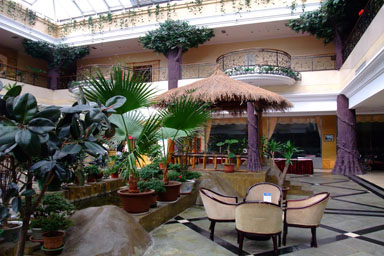

In [10]:
real_image_path = r"C:\Users\Akhila\Downloads\Tp\Tp_S_NRN_S_N_ind10103_ind10104_11552.jpg"
Image.open(real_image_path)

In [11]:
image_size = (128, 128)

def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 85).resize(image_size)).flatten() / 255.0

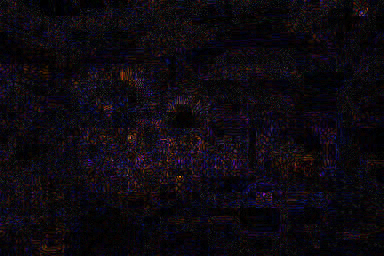

In [12]:
convert_to_ela_image(real_image_path, 85)

In [15]:
import numpy as np
path = r"C:\Users\Akhila\Downloads\Tp\Tp_S_NRN_S_N_ind10103_ind10104_11552.jpg"
x2 = prepare_image(path)
x2 = x2.reshape(-1, 128, 128, 3)
x2

array([[[[0.05490196, 0.04705882, 0.05882353],
         [0.05098039, 0.06666667, 0.08627451],
         [0.09019608, 0.08627451, 0.08627451],
         ...,
         [0.01960784, 0.01960784, 0.05490196],
         [0.04313725, 0.04705882, 0.05098039],
         [0.03921569, 0.03921569, 0.03921569]],

        [[0.05490196, 0.05882353, 0.0627451 ],
         [0.03921569, 0.04313725, 0.03137255],
         [0.05490196, 0.03921569, 0.04313725],
         ...,
         [0.01960784, 0.02352941, 0.03137255],
         [0.03529412, 0.03529412, 0.03529412],
         [0.05490196, 0.04705882, 0.05882353]],

        [[0.03137255, 0.03529412, 0.04313725],
         [0.01960784, 0.02352941, 0.05098039],
         [0.03137255, 0.02352941, 0.04705882],
         ...,
         [0.0627451 , 0.03529412, 0.03921569],
         [0.03529412, 0.03921569, 0.03921569],
         [0.03921569, 0.03529412, 0.03529412]],

        ...,

        [[0.02352941, 0.02352941, 0.06666667],
         [0.01176471, 0.01568627, 0.02352941]

In [16]:
#TESTING THE IMAGE AND MAKING PREDICTION
arr = model.predict(x2)
print(arr)
if(arr[0][0]>arr[0][1]):
    print("IMAGE IS TAMPERED")
else:
    print("IMAGE IS AUTHENTICATED");

[[0.99795973 0.00204023]]
IMAGE IS TAMPERED
